# Image Classification

- CIFAR 10 Dataset (In-built)

#### CIFAR-10 consists of 60,000 32x32 color images in 10 different classes, with each class containing 6,000 images. 
These images are divided into a training set of 50,000 images and a test set of 10,000 images.

The 10 classes in the CIFAR-10 dataset are:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck


### Step 1: Import necessary libraries

In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

### Step 2: Load and preprocess the CIFAR-10 dataset

In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


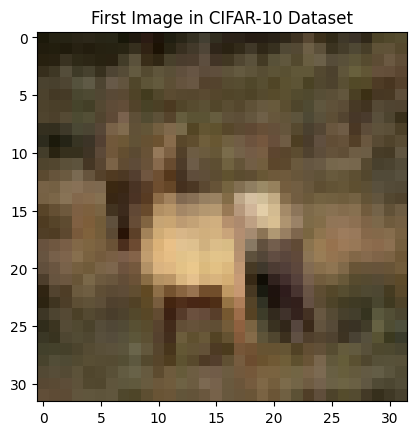

In [3]:
# Visualize the first image from the training set
plt.imshow(train_images[3])
plt.title("First Image in CIFAR-10 Dataset")
plt.show()


In [4]:

# Normalize pixel values to a range of [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Step 3: Create a deep learning model

In [5]:
# Create a deep learning model
model = models.Sequential([
    # Step 4: Convolutional Layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Step 5: Flatten the output
    layers.Flatten(),

    # Step 6: Fully Connected Layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes for CIFAR-10
])

d:\anaconda\envs\BIA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 4: Compile the model

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
# model.summary()

### Step 5: Train the model

In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 0.3513 - loss: 1.7466 - val_accuracy: 0.5635 - val_loss: 1.2112
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.5805 - loss: 1.1796 - val_accuracy: 0.6328 - val_loss: 1.0454
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6404 - loss: 1.0078 - val_accuracy: 0.6541 - val_loss: 0.9892
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.6842 - loss: 0.8989 - val_accuracy: 0.6772 - val_loss: 0.9312
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7123 - loss: 0.8184 - val_accuracy: 0.6777 - val_loss: 0.9347
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7312 - loss: 0.7614 - val_accuracy: 0.6737 - val_loss: 0.9400
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7505 - loss: 0.7085 - val_accuracy: 0.6952 - val_loss: 0.8700
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7670 -

In [9]:
# Create a deep learning model with more layers and techniques for better accuracy
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),  # Normalizes output of previous layer
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),  # Increased filters
    layers.BatchNormalization(),
    
    # Convolutional Layer 4
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output
    layers.Flatten(),
    
    # Fully Connected Layer 1
    layers.Dense(128, activation='relu'),  # Increased number of neurons
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting

    # Output Layer
    layers.Dense(10)  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))  # Increased epochs for better training


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 61ms/step - accuracy: 0.3792 - loss: 1.7819 - val_accuracy: 0.2571 - val_loss: 2.6540
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.5980 - loss: 1.1562 - val_accuracy: 0.5608 - val_loss: 1.2815
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6684 - loss: 0.9593 - val_accuracy: 0.6749 - val_loss: 0.9531
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7131 - loss: 0.8389 - val_accuracy: 0.6837 - val_loss: 0.9247
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.7460 - loss: 0.7479 - val_accuracy: 0.6983 - val_loss: 0.9066


In [10]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Create a deep learning model with more layers and techniques for better accuracy
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),  # Normalizes output of previous layer
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Dropout layer after first convolutional block
    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout layer after second convolutional block
    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),  # Increased filters
    layers.BatchNormalization(),
    
    # Convolutional Layer 4
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output
    layers.Flatten(),
    
    # Fully Connected Layer 1
    layers.Dense(128, activation='relu'),  # Increased number of neurons
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting

    # Output Layer
    layers.Dense(10)  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=5,          # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore model weights from the epoch with the best validation loss

# Train the model with early stopping
history = model.fit(train_images, train_labels,
                    epochs=10,  # You can set this higher since early stopping will stop training
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])  # Add the early stopping callback


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 70ms/step - accuracy: 0.3419 - loss: 1.8647 - val_accuracy: 0.3471 - val_loss: 1.9558
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 64ms/step - accuracy: 0.5309 - loss: 1.3254 - val_accuracy: 0.4986 - val_loss: 1.6059
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - accuracy: 0.6091 - loss: 1.1294 - val_accuracy: 0.6452 - val_loss: 1.0030
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.6433 - loss: 1.0281 - val_accuracy: 0.6195 - val_loss: 1.1167
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.6770 - loss: 0.9322 - val_accuracy: 0.6410 - val_loss: 1.1096
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.6960 - loss: 0.8806 - val_accuracy: 0.7005 - val_loss: 0.8714
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7180 - loss: 0.8303 - val_accuracy: 0.6919 - val_loss: 0.9016
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.72

### Step 6: Evaluate the model

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7322 - loss: 0.7966
Test accuracy: 0.7304999828338623


### Step 7: Visualize training history

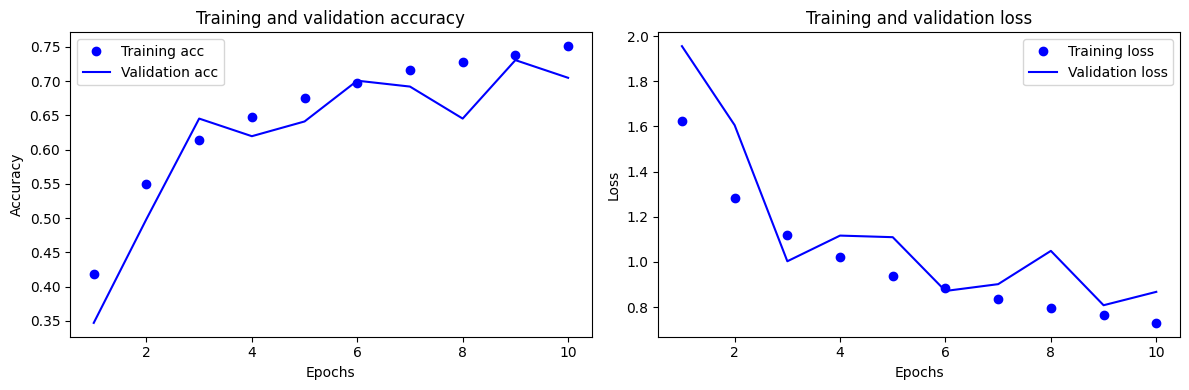

In [12]:
# Visualize training history
def plot_training_history(history):
    # Extract training history metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create plots for accuracy and loss
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

### Step 8: Visualize example predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


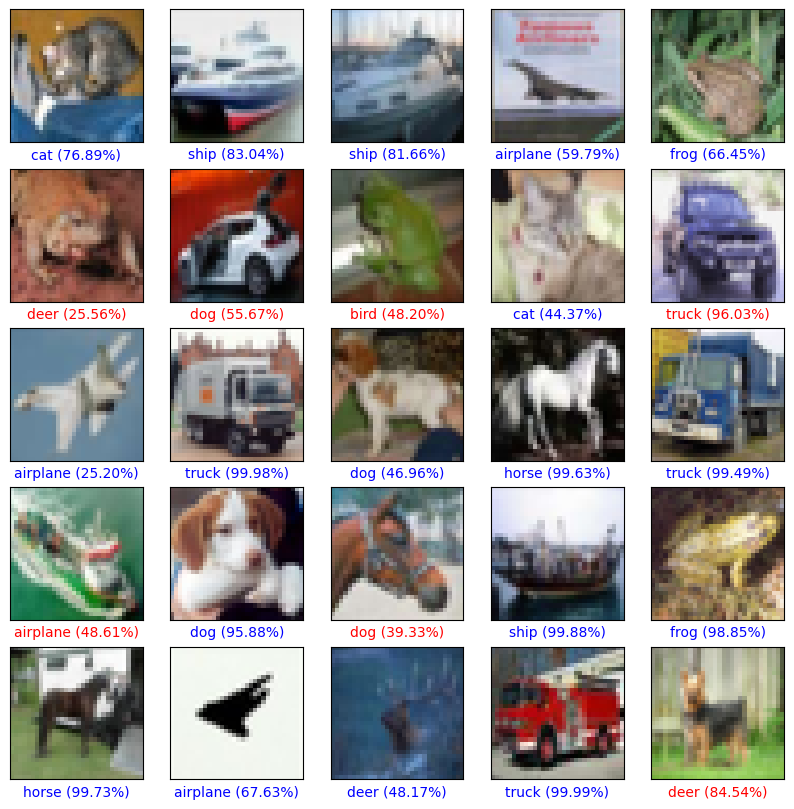

In [13]:
# Visualize example predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_example_predictions():
    # Get predictions and convert logits to probabilities
    predictions = model.predict(test_images)
    predictions = tf.nn.softmax(predictions).numpy()  # Apply softmax to convert logits to probabilities

    num_rows, num_cols = 5, 5
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(test_labels[i])
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({100 * np.max(predictions[i]):.2f}%)", color=color)

# Call the function to plot example predictions
plot_example_predictions()
